<a href="https://colab.research.google.com/github/sreekrishna7/Nationality_Identificaton/blob/master/Nationality_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
# standard data science libs   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# To use google drive (to read data from google drive to colab) 
from google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#save path to the project folder
root_path =  'gdrive/My Drive/AI_Projects/'
proj_path =  'gdrive/My Drive/AI_Projects/Nationality_Identification'


In [ ]:
#make folder names
folders  = ['Indian_man', 'American_man', 'Chineese_man']

In [ ]:
#create all folders in /Nationality_Identification
#for i in folders:
 # path =  Path(proj_path)
  #dest = (path/i).mkdir(parents=True,exist_ok = True)

In [ ]:
# save fastai path
p_path = Path(proj_path)  

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:

data.classes

['American_man', 'Chineese_man', 'Indian_man']

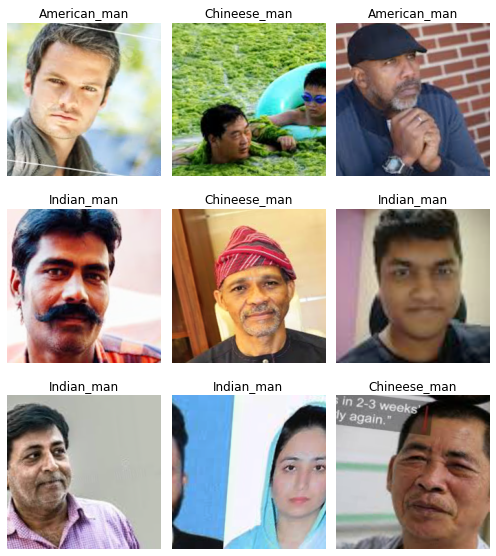

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.848388,1.162120,0.542857,04:12
1,1.662505,1.132528,0.417143,03:51
2,1.508259,1.192312,0.428571,03:52
3,1.342445,1.106001,0.388571,03:54
4,1.206649,0.997592,0.365714,03:51
5,1.076692,0.964323,0.360000,03:51
6,0.986875,0.948617,0.365714,03:54
7,0.914174,0.939941,0.360000,03:50


In [ ]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Nationality_Identification/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


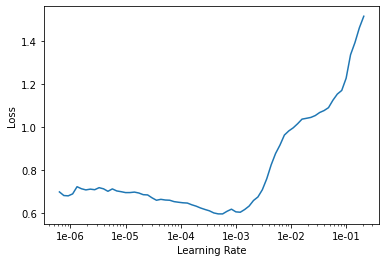

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.624331,0.927725,0.371429,05:35
1,0.630691,0.914516,0.348571,05:33


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


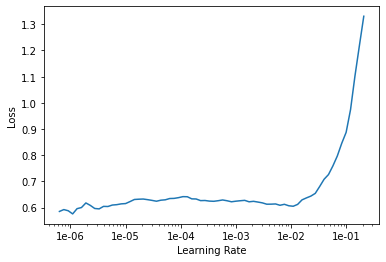

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:

learn.save('model2_34')

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)


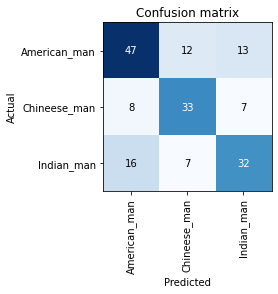

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

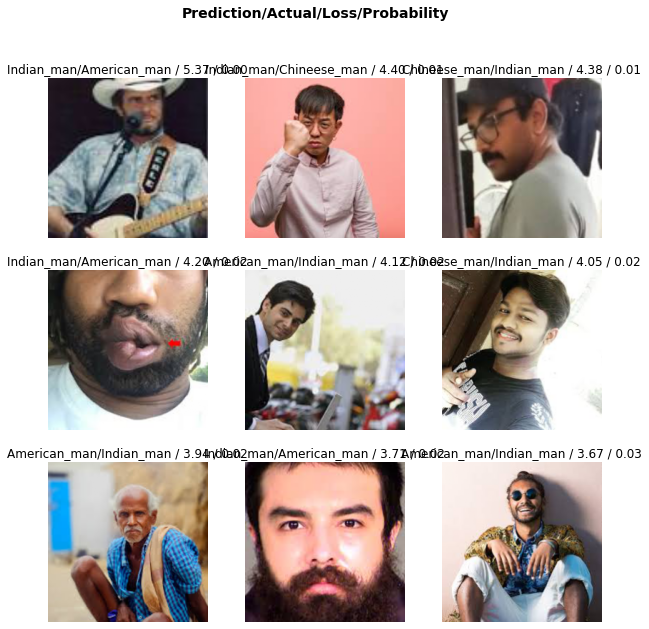

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))


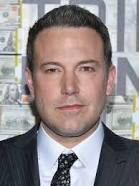

In [ ]:

#img_indian= open_image(Path(root_path)/'Indian_Valid'/'Mohan.jpg')
#img_indian
#img_chinese= open_image(Path(root_path)/'Chinese_Valid'/'Jackie_valid.jpg')
#img_chinese
img_american= open_image(Path(root_path)/'American_Valid'/'Ben.jpg')
img_american

In [ ]:
#pred_class,pred_idx,outputs = learn.predict(img_indian)
#pred_class
#pred_class,pred_idx,outputs = learn.predict(img_chinese)
#pred_class
pred_class,pred_idx,outputs = learn.predict(img_american)
pred_class

Category tensor(1)